## Цель, задача:

### Вариант №12

Найти точку **максимуиа** функции 

$$f(x_{1},x_{2}) = -3x_{1}^2 -42x_{1} -2x_{2}^2 -12x_{2} - 158,$$ 

$$[x_{1} = 1, x_{2} = 8]$$

методом **градиентным с дроблением шага**. 

## Теоретическая часть
Задаем $x_{0}$- произвольная начальная точка.

Выбираем шаг h
1. Установливаем направление убывания целевой функции. Для этого необходимо взять $x_1=x_0+p*a+|h|$ и $x_2=x_0+p*a-|h|$ . Если $f_1<f_2$, то нужно поменять направление движения $h=-h$.
2. Если $f(x_0+p*a+|h|)>=f(x_0)<=f(x_0+p*a-|h|)$, то точка минимума лежит между $x_0+p*a-|h|$  и $x_0+p*a-|h|$ и поиск нраничных точек завершен в противном случае изменить начальную точку.

Для одномерной минимизации используем метод **квадратичной интерполяции**. 
$$f(a1)=a*a1^2+b*a1+c$$
$$f(a2)=a*a2^2+b*a2+c$$
$$f(0)=c$$
Выражаем а и b:
$$a=((f(a1)/a1-f(a2)/a2)+c*(1/a1+1/a2))/(a1+a2)$$
$$b=((f(a1)/a1^2-f(a2)/a2^2)+c(1/a1^2+1/a2^2)(1/a1-1/a2)$$
Подставляем в форумулу для альфа:
$$a_min=-b/2a$$

0.14687235278396604
Значение функции в точке максимума:36.88815092060321
Точка минимум:[-6.04987293  1.53761648]
[ 7.29850933 33.73356165  3.46876677 87.29669795 -6.04987293] [13.77363355 38.00576485 10.2630362  87.10530646  1.53761648]


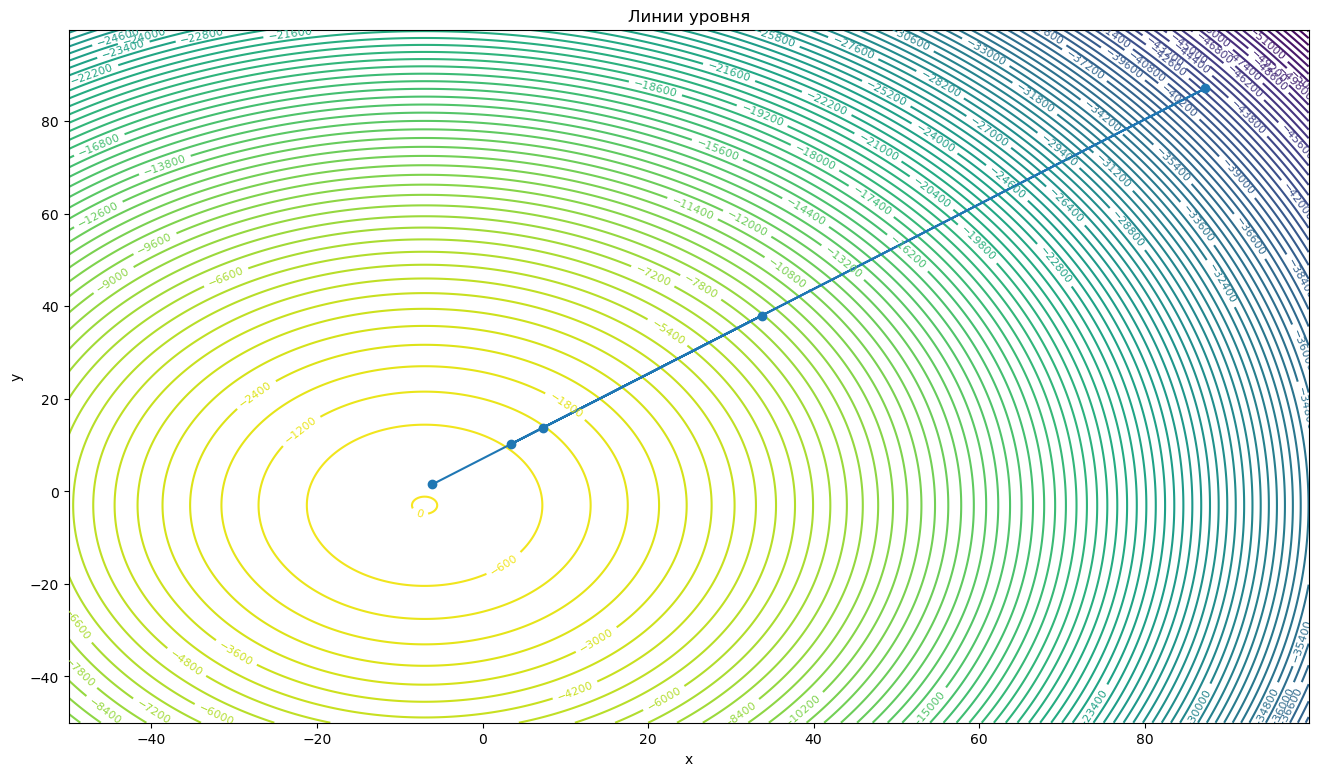

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab

x1=1
x2=8

def f(x):
    return 3*x[0]**2+42*x[0]+2*x[1]**2+12*x[1]+158.0
def df1(x1): 
    return 6*x1+42
def df2(x2): 
    return 4*x2+12
p=np.array([-df1(x1),-df2(x2)], dtype=float)
x0=np.array([x1,x2], dtype=float)


X=np.array([0,0,0,0,0],dtype=float)
Y=np.array([0,0,0,0,0],dtype=float)
B=np.array([0,0],dtype=float)

#параметры
a=2.0
a1=0
a2=0
i=0
while ((f(x0+p*a)-f(x0))>= 10e-6):
    
    if f(x0+p*a)<f(x0):
        x0=x0+a*p
        p=[-df1(x0[0]),-df2(x0[1])]
    else:  
        c=37
        h=1 
        if (f(x0+p*a-abs(h))<f(x0)<f(x0+p*a+abs(h))):
            h=-h
        if (f(x0+p*a-abs(h))>=f(x0)<=f(x0+p*a+abs(h))):
            a1=a+h
            a2=a-h
            f1=f(x0+p*a1)
            f2=f(x0+p*a2)
            b=-(f1/a1**2-f2/a2**2+c*(1/a1**2+1/a2**2))/(1/a1**2-1/a2**2)
            d=(f1/a1-f2/a2+c*(1/a1+1/a2))/(a1-a2)
            a=-b/(2*d)
        else: h=h+0.5
        B=x0+a*p
        X[i]=B[0]
        Y[i]=B[1]
        i+=1
print(a) # оптимальное значение параметра
print(f"Значение функции в точке максимума:{f(x0+p*a)}")
print(f"Точка максимум:{B}")
print(X,Y) # Точки представленные на графике
x = [i/5 for i in range(-250,500)]
y = [i/5 for i in range(-250,500)]
X1, Y1 = np.meshgrid(x, y)
Z = -3*X1**2-42*X1-2*Y1**2-12*Y1-158
pylab.figure(figsize = (16, 9))
pylab.title('Линии уровня')
pylab.xlabel('x')
pylab.ylabel('y')
CS=pylab.contour(X1, Y1, Z,100)
pylab.clabel(CS, fontsize=8)
pylab.plot(X, Y, 'o-')
pylab.show()

### Метод случайного поиска
Пусть стоит задача найти минимум функции двух переменных $f(x, y)$.
1. Задается начальная точка $x_0, y_0$,начальная длина шага по плоскости $h$ и точность $\varepsilon$;
2. С помощью генератора случайных чисел выбирается случайное направление на плоскости;
3. Делается шаг $h$ в этом направлении и вычисляется функционал в новой точке;
4. Если значение функции в новой точке больше, чем в старой, шаг уменьшается вдвое, а направление меняется на случайное. Если значение функции в новой точке меньше, чем в старой, шаг увеличивается в полтора раза, а текущая точка обновляется на новую.

(-6.998487524790846, array([-6.98259836, -3.01737849]), 50)


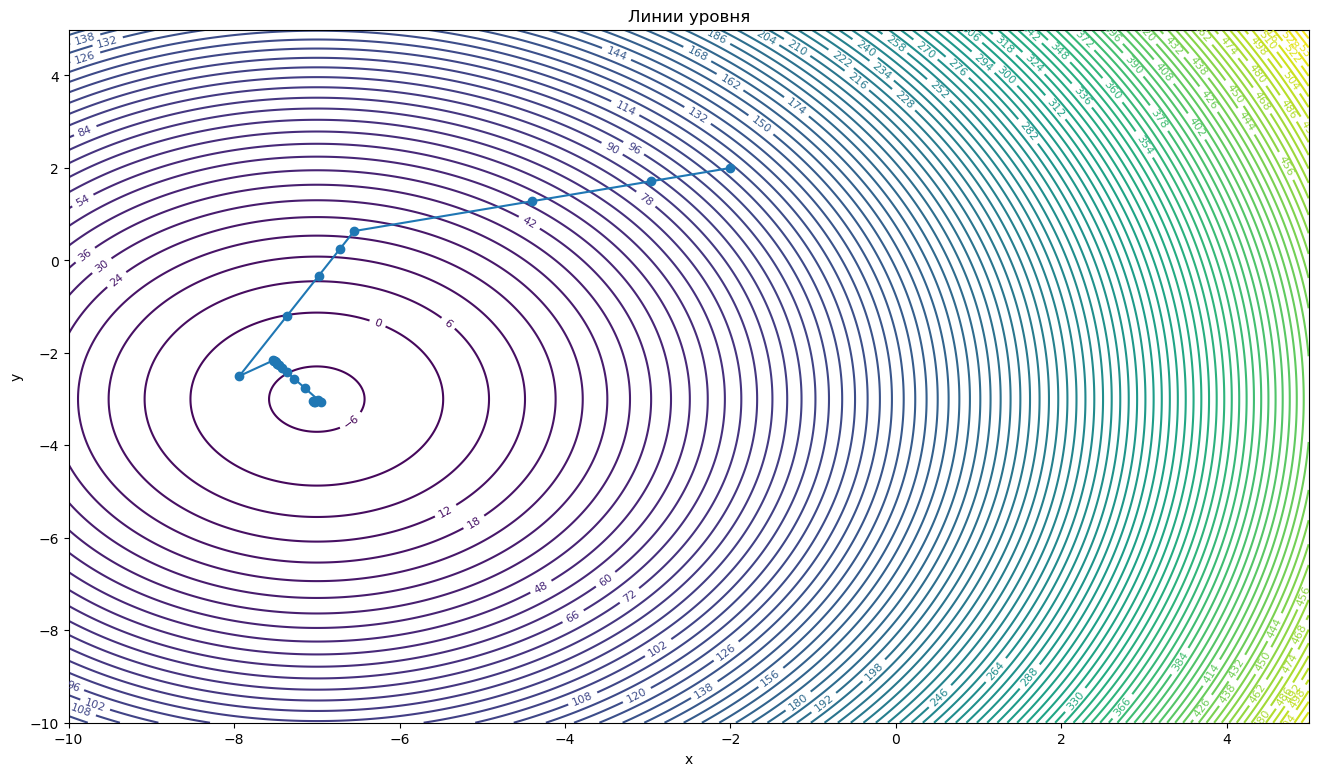

In [7]:
import random as rand

import pylab
rand.seed()
def f(x): # Исходная функция
    return 3*x[0]**2+42*x[0]+2*x[1]**2+12*x[1]+158
x0 = np.array([-2, 2])
rand.seed()

def random_poisk(f, x, h=1, E=1e-3):
    
    x0 = x
    tp = [x0]
    i = 0
    v = np.array([-1 + rand.random()*2, -1 + rand.random()*2]) # Задаём направление

    while h >= E:
        i += 1
        tau = h / np.linalg.norm(v) # Коэффициент перехода к новой точке
        x1 = x0 + tau*v # Вычисляем координаты новой точки
        if f(x1) > f(x0):
            h = 0.5*h
            v = np.array([-1 + rand.random()*2, -1 + rand.random()*2])
        else:
            h = 1.5*h
            x0 = x1
            tp = np.append(tp, [x1], axis=0)
    print((f(x1), x1, i))
    return tp        
        
tp = random_poisk(f, x0)

x = [i/100 for i in range(-1000,500)]
y = [i/100 for i in range(-1000,500)]
X, Y = np.meshgrid(x, y)
Z = 3*X**2+42*X+2*Y**2+12*Y+158
pylab.figure(figsize = (16, 9))
pylab.title('Линии уровня')
pylab.xlabel('x')
pylab.ylabel('y')
CS=pylab.contour(X, Y, Z,100)
XX=[]; YY=[]
for coord in  tp:
    XX.append(coord[0])
    YY.append(coord[1])
pylab.clabel(CS, fontsize=8)
pylab.plot(XX, YY, 'o-')
pylab.show()